# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала.

<!--
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

WAV — это формат для хранения несжатого аудиопотока, широко используемый в медиаиндустрии. Его особенность в том, что для кодирования амплитуды выделяется фиксированное число бит. Это сказывается на размере выходного файла, но делает его очень удобным для чтения. Типичный wave-файл состоит из заголовочной части, тела с аудиопотоком и хвоста для дополнительной информации, куда аудиоредакторы могут записывать собственные метаданные.

В заголовке файла хранится информация о:
- Размере файла.
- Количестве каналов.
- Частоте дискретизации.
- Количестве бит в сэмпле (эту величину ещё называют глубиной звучания).

### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [ ]:
import librosa
import librosa.display
import IPython
import IPython.display as ipd
import pandas as pd
import scipy
import seaborn as sns

Библиотека librosa загружает и декорирует звук, как временной ряд.
y - представлен как одномерный массив numpy.
sr - содержит частоту дискретизации y, то есть количество отсчетов звука в секунду.
По умолчанию весь звук микшируется в моно и происходит Передискретизация до 22050 Гц во время загрузки.
Частота дискретизации (Sample Rate) - это количество аудио сэмпла, передаваемых в секунду, которое измеряется в Гц или кГц (число выборок аудиосигнала, приходящихся на секунду).

In [ ]:
audio_data = 'data/alekseev_voice_2023.10.26.wav'
y, sr = librosa.load(audio_data)
print(type(y), type(sr))
print(y.shape, sr)
print(y, sr)

<class 'numpy.ndarray'> <class 'int'>
(349454,) 22050
[-1.2403750e-04 -1.6140242e-04 -1.1281282e-04 ...  5.8203714e-05
  6.9623027e-05  0.0000000e+00] 22050


С помощью IPython.display проигрываем аудио, а с помощью display.waveshow формируем звуковые волны как выглядит звук

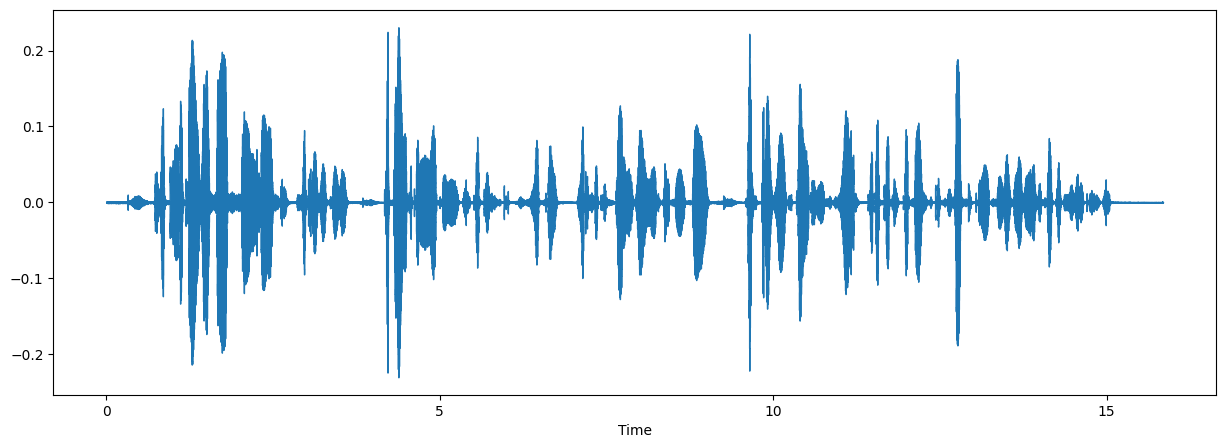

In [ ]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(y, rate=sr)

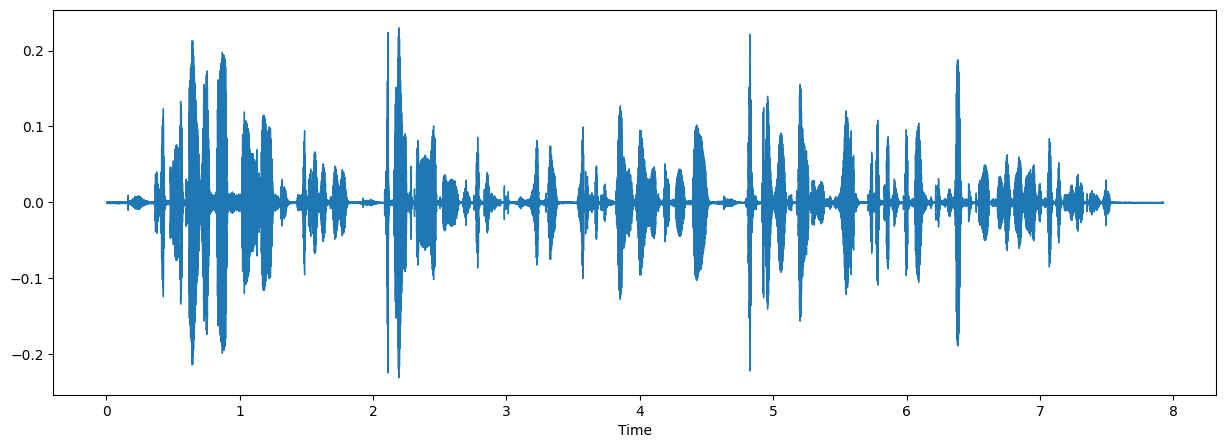

In [ ]:
plt.figure(figsize=(15, 5))
sr_fast = sr*2
librosa.display.waveshow(y, sr=sr_fast)
ipd.Audio(y, rate=sr_fast)

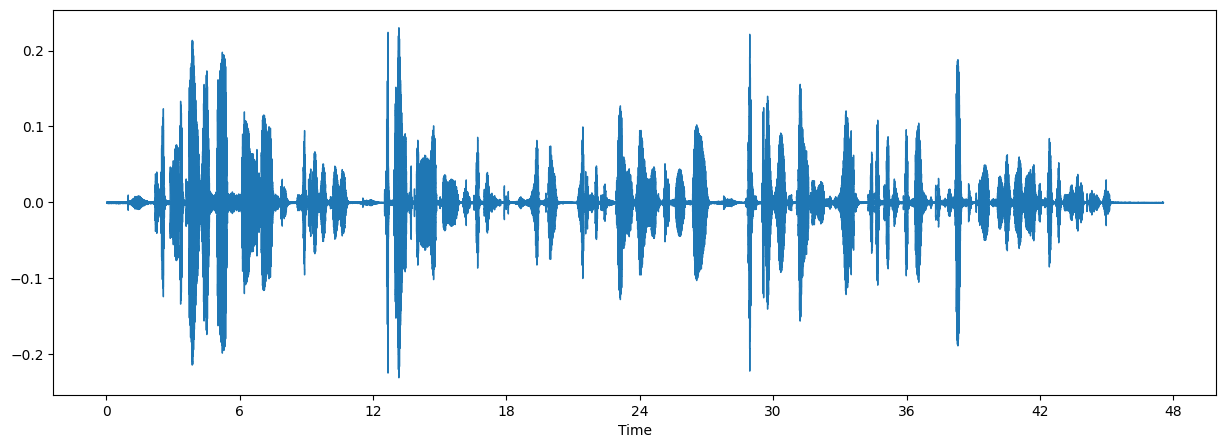

In [ ]:
plt.figure(figsize=(15, 5))
sr_slow = sr/3
librosa.display.waveshow(y, sr=sr_slow)
ipd.Audio(y, rate=sr_slow)

При удвоенной частоте дискретизации едва удаётся разобрать речь, тоже самое можно сказать при понижении частоты в трое.

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

WAV (Hi-Res). Стандартный формат, в котором записаны все CD. Отличное качество звука, но огромный размер файлов из-за отсутствия сжатия. Слабая поддержка метаданных (обложек, названий песен и исполнителей).

MP3 (не является форматом Hi-Res-аудио). Популярный формат со сжатием и потерями с малым размером файла и далеко не самым высоким качеством звучания. Удобен для хранения музыки на смартфонах и плеерах iPod.

OGG (не является форматом Hi-Res-аудио). Иногда называется полным именем – Ogg Vorbis. Альтернатива MP3 и AAC с открытым кодом, не подпадающая под действие патентов. Этот формат с битрейтом 320 кбит/с используется в трансляциях Spotify.



# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону.

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время.


In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10,
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
        color = 'k',
        linewidth = 1)
    plt.grid(which='minor',
        color = 'k',
        linestyle = ':')
    plt.show()

In [ ]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

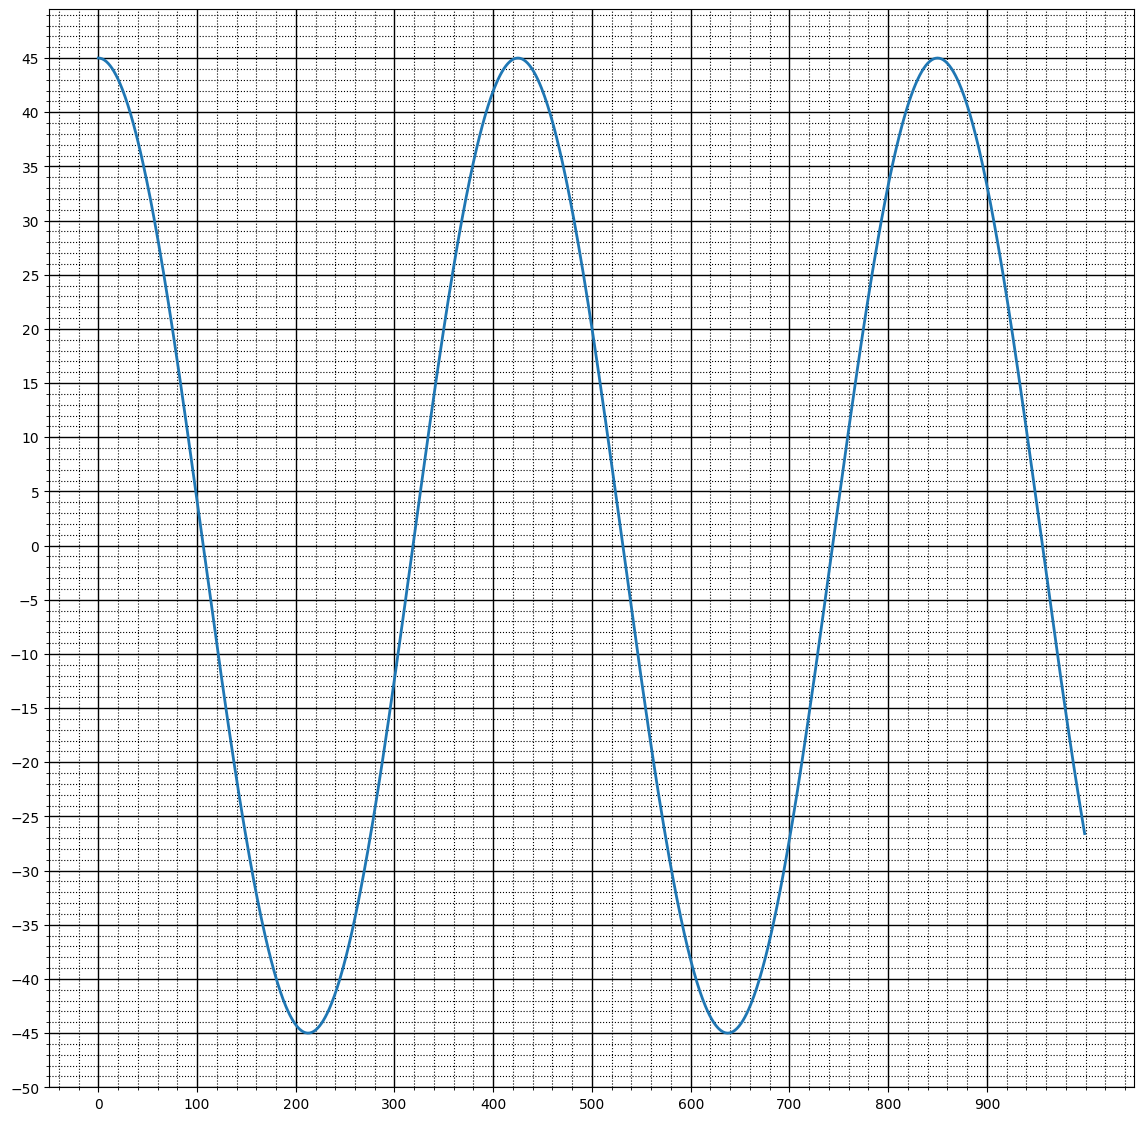

In [ ]:
draw_signal(test_data['task2']['a'])

In [ ]:
#Анализируя выше приведённый график подбираем амплитуду, циклическую частоту и фазовый сдвиг
a = 45 * np.cos(0.0148 * np.arange(1000))

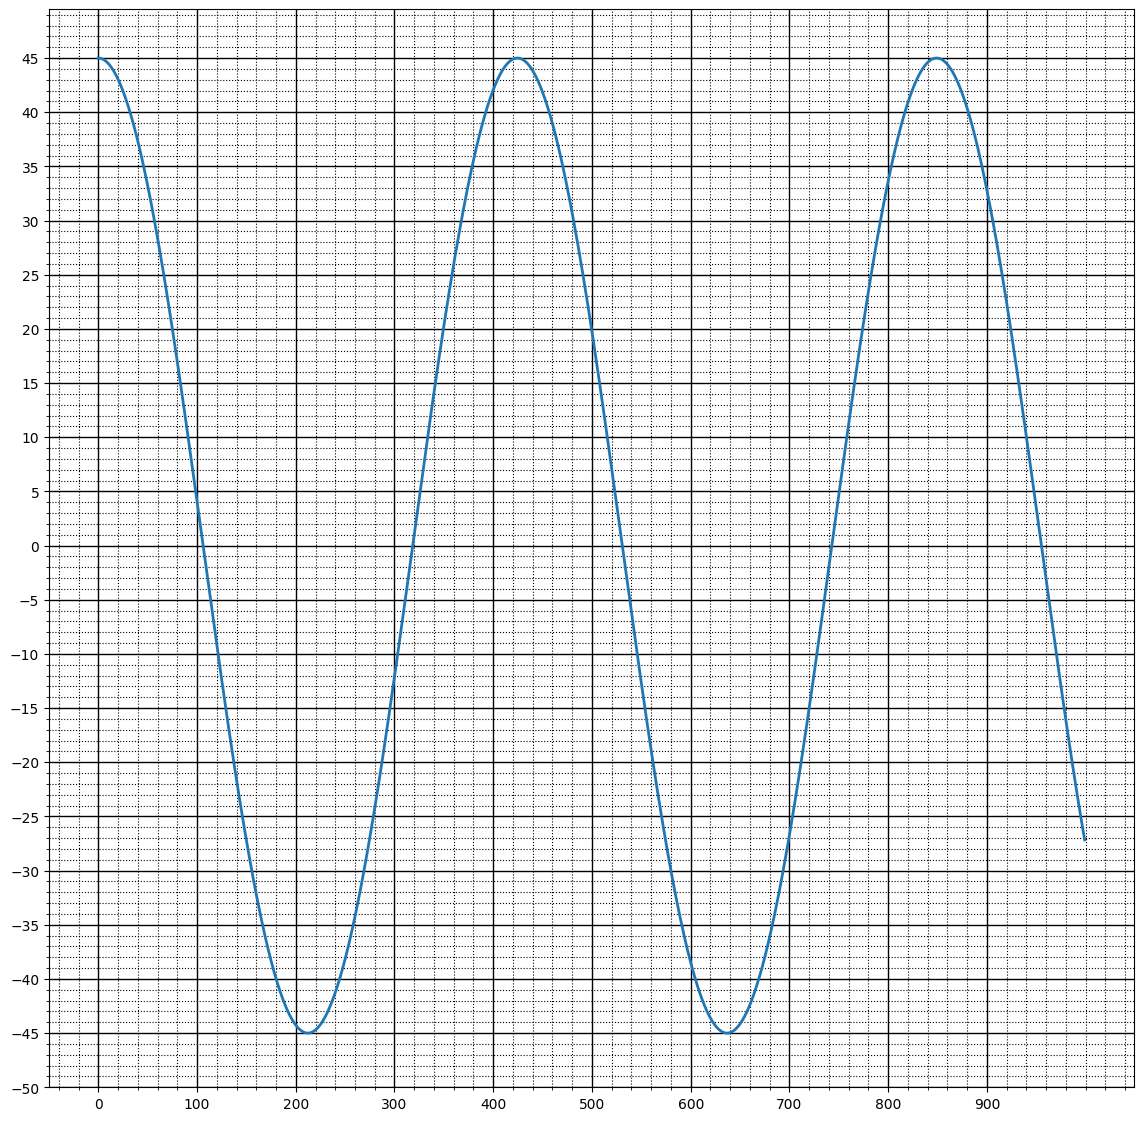

In [ ]:
draw_signal(a)

In [ ]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


A = 45.0 omega = 0.014783965428655938
Ok!


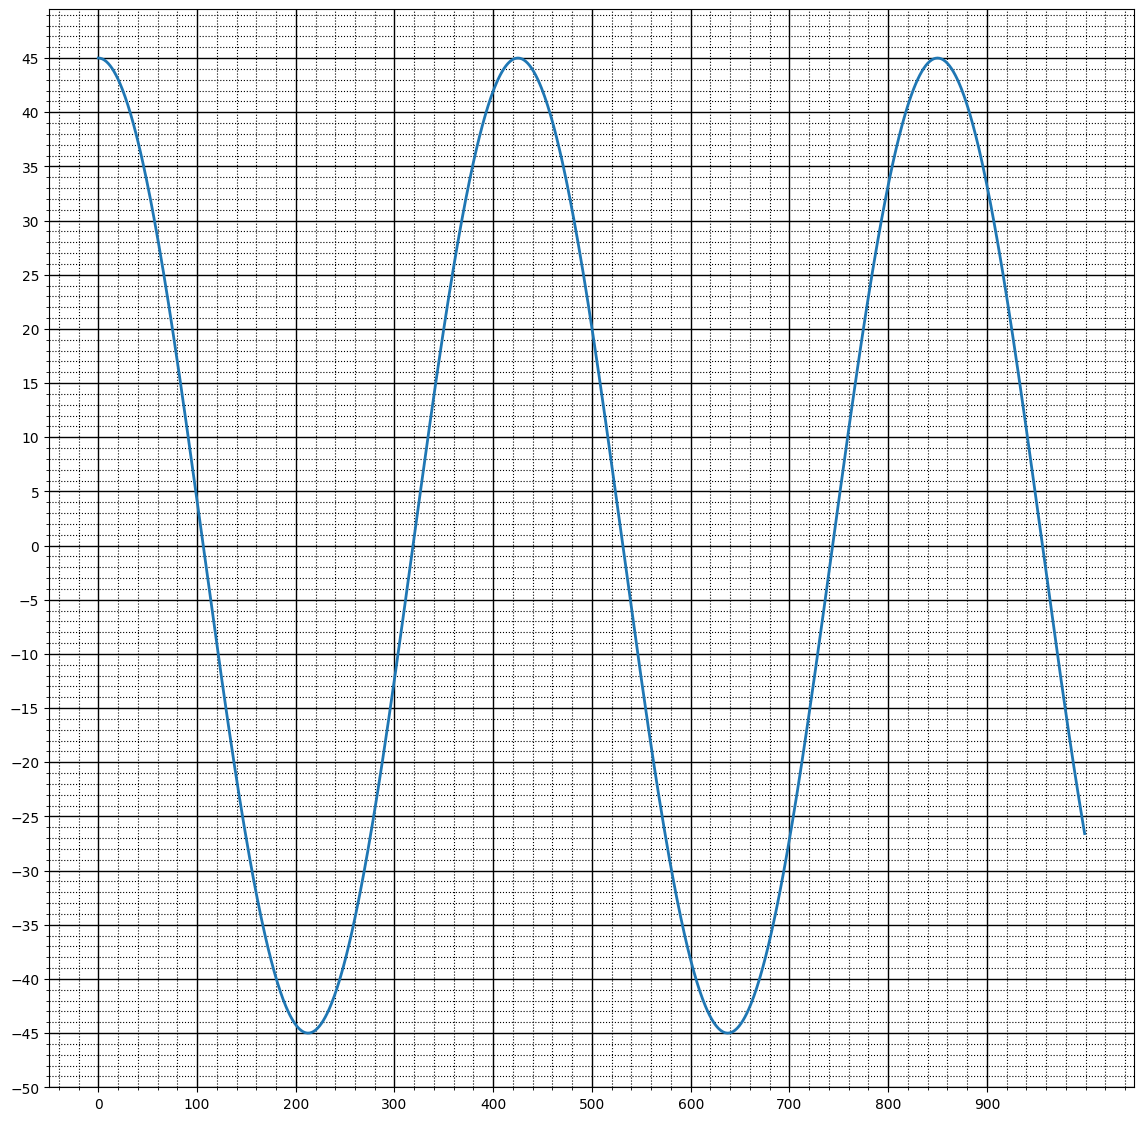

In [ ]:
#Выполнено тоже самое, но с использованием библиотеки nupmy и функции arccos
k = np.arccos(test_data['task2']['a'][1:2]/max(test_data['task2']['a']))
a = max(test_data['task2']['a']) * np.cos(k * np.arange(1000))
print('A =', max(test_data['task2']['a']), 'omega =', *k)

#Проверка
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

draw_signal(a)

**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A=  $45

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) =  $0.014783965428655938

3. Фаза - $\phi=  $0

### Сигнал ***b***

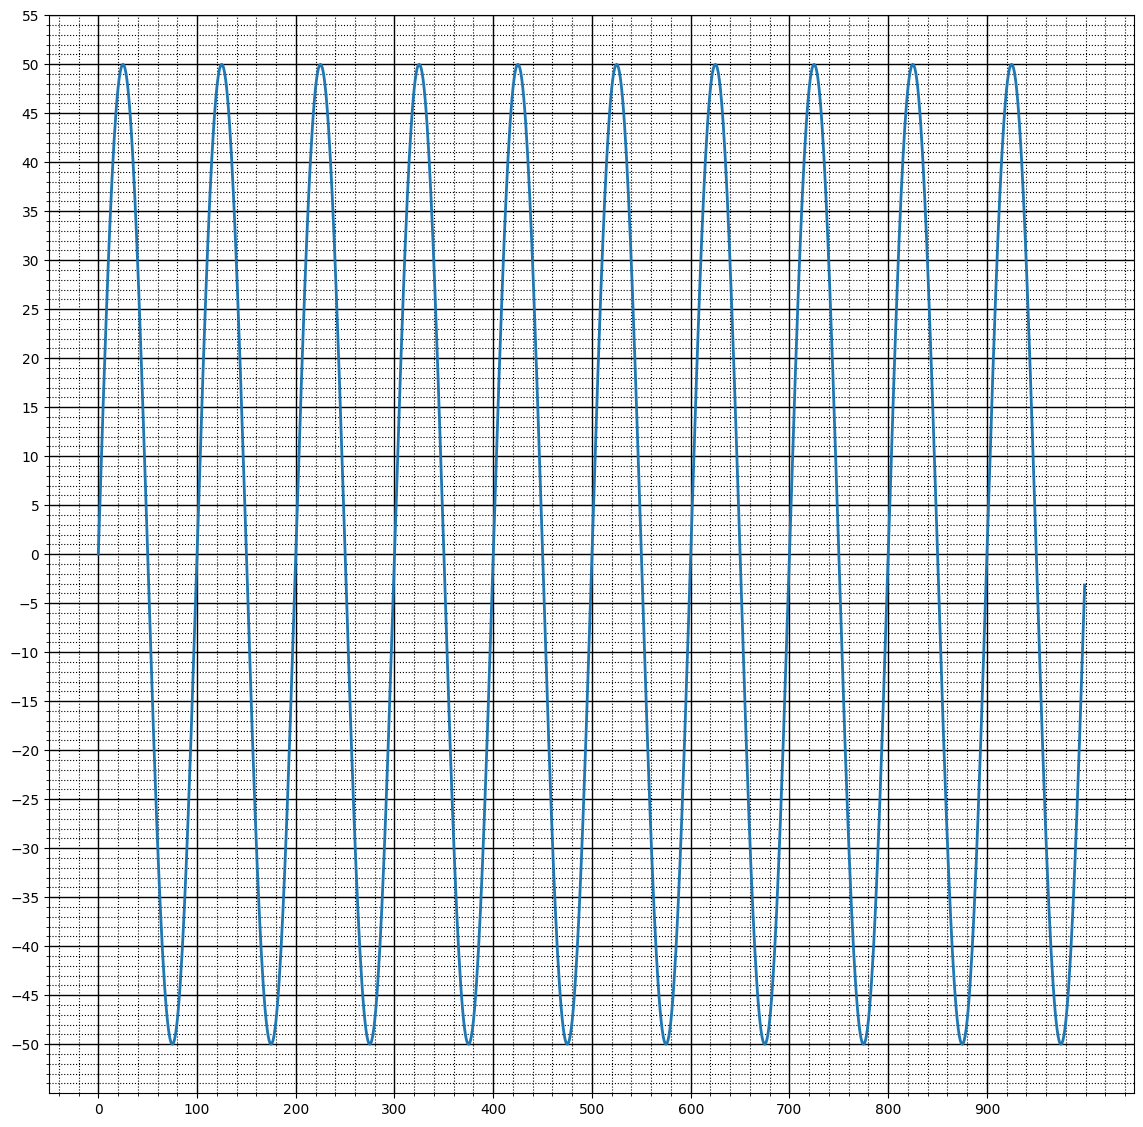

In [ ]:
draw_signal(test_data['task2']['b'])

In [ ]:
#Анализируя выше приведённый график подбираем амплитуду, циклическую частоту и фазовый сдвиг
b = 50*np.sin(0.06283*np.arange(1000))

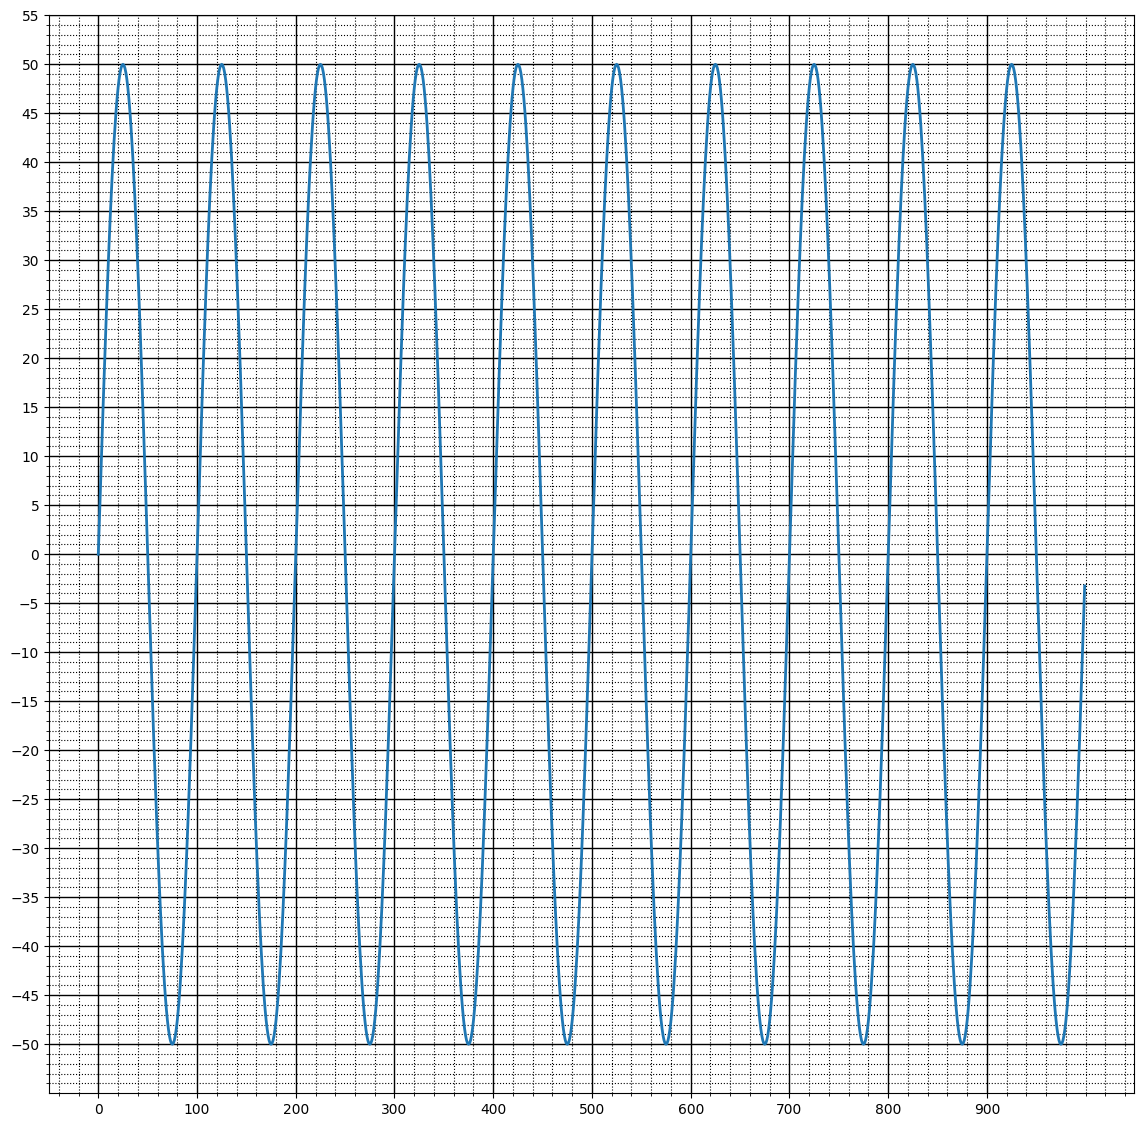

In [ ]:
draw_signal(b)

In [ ]:
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


A = 50.0 omega = 0.06283185307179587
Ok!


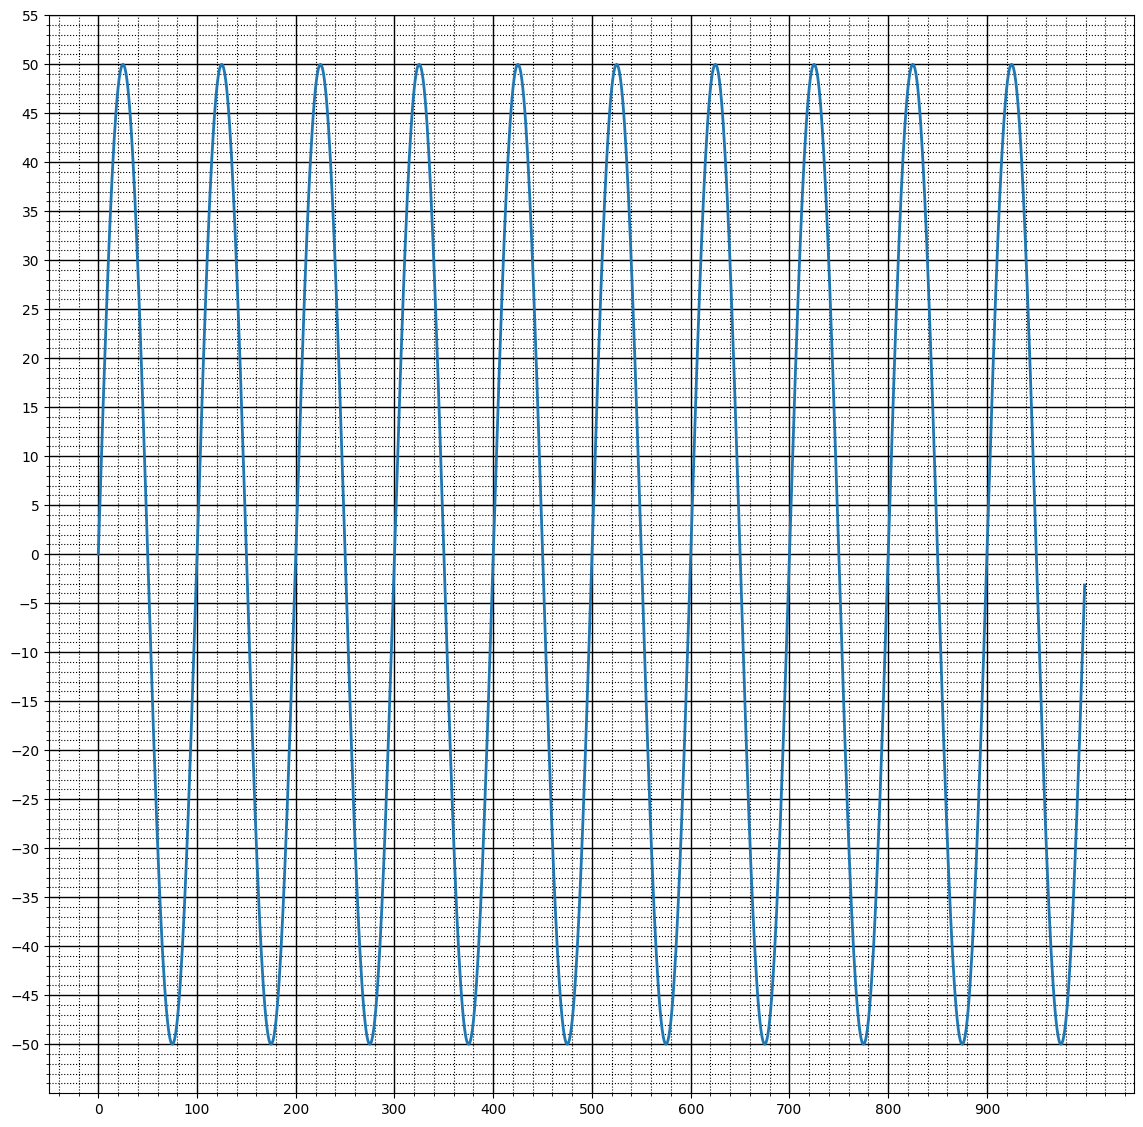

In [ ]:
#Выполнено тоже самое, но с использованием библиотеки nupmy и функции arcsin
k = np.arcsin(test_data['task2']['b'][1:2]/max(test_data['task2']['b']))
b = max(test_data['task2']['b']) * np.sin(k * np.arange(1000))
print('A =', max(test_data['task2']['b']), 'omega =', *k)

#Проверка для b
assert len(b)== 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

draw_signal(b)

**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= $50.0

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = $0.06283185307179587

3. Фаза - $\phi= $0

### Сигнал ***c***

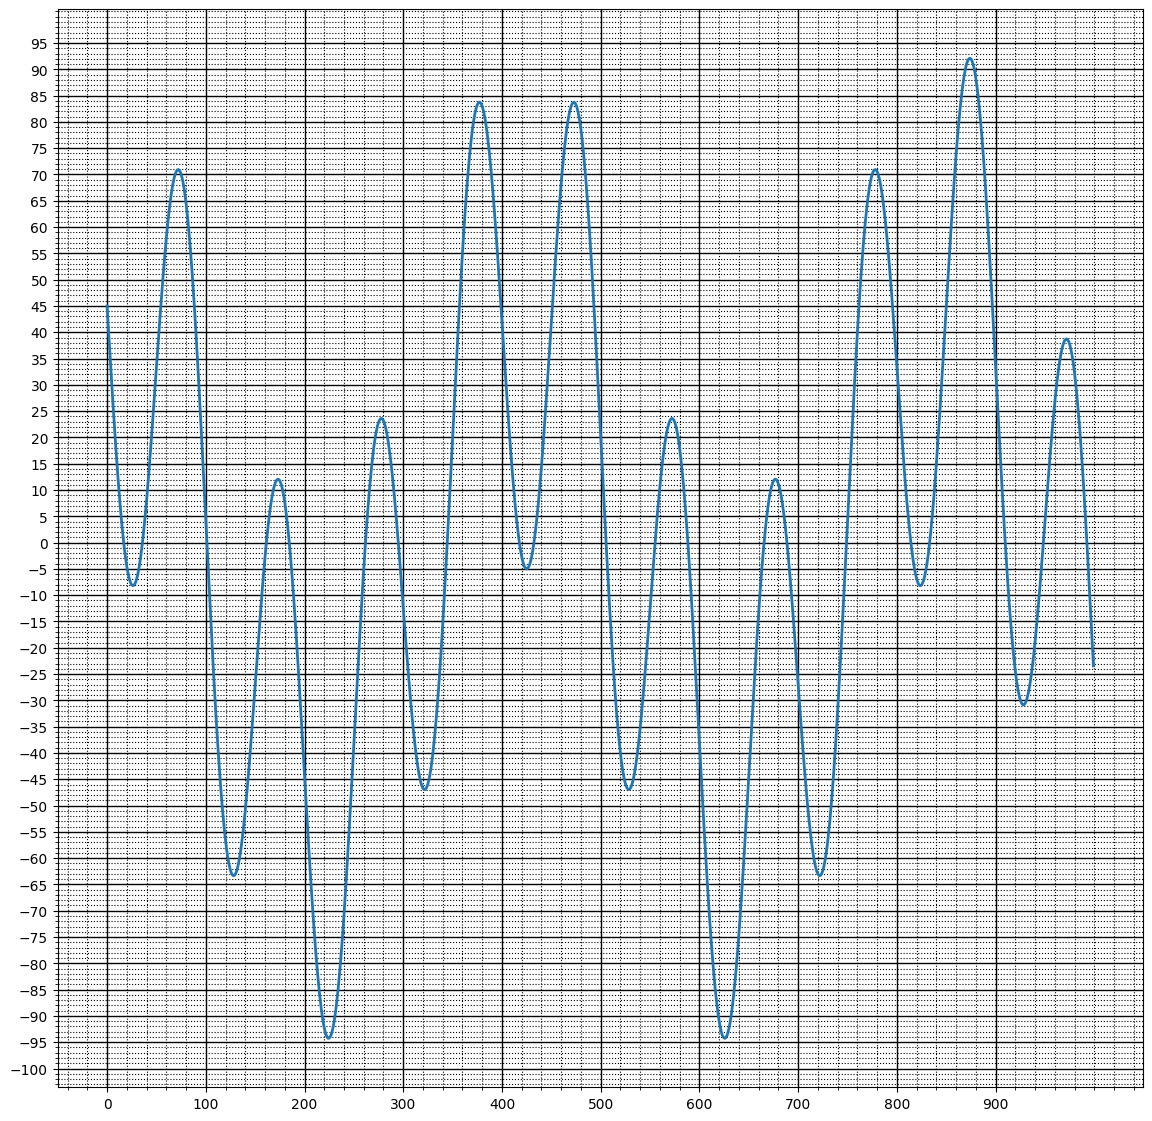

In [ ]:
draw_signal(test_data['task2']['c'])

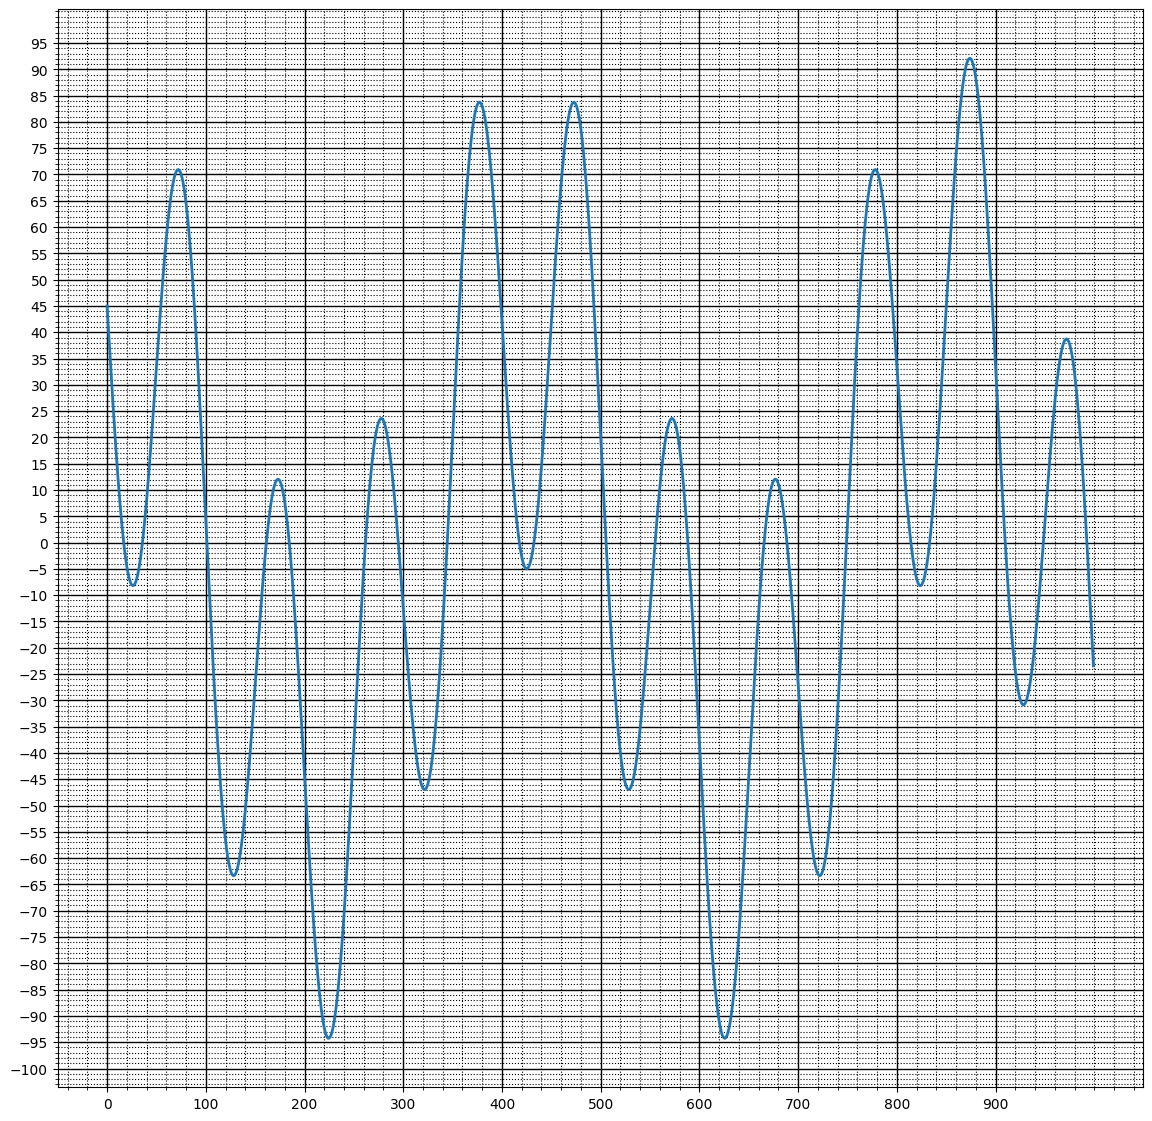

In [ ]:
# сигнал состоит из двух гармоник
c = a - b
draw_signal(c)

In [ ]:
assert len(c)== 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [ ]:
def convolve(in1, in2):
    T = len(in1) + len(in2)
    in2_len = len(in2)
    in2 = np.append(in2, np.zeros(len(in1), dtype='int'), 0)
    in1 = np.append(in1, np.zeros(in2_len, dtype='int'), 0)
    x = []
    for i in range(T - 1):
        sum = 0
        for j in range(i):
            sum += in1[i - j] * in2[j]
        x.append(sum)
    return x

In [ ]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [ ]:
a = np.repeat([0,1,0], 10)
b = np.array([0,1,2,3,2,1,0])

In [ ]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

In [ ]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_convolve(data, ymax=5, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=3)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 40, step=5))
    plt.yticks(np.arange(0, ymax, step=1))
    plt.grid(which='major', color = 'k', linewidth = 1)
    plt.grid(which='minor', color = 'k', linestyle = ':')
    plt.show()

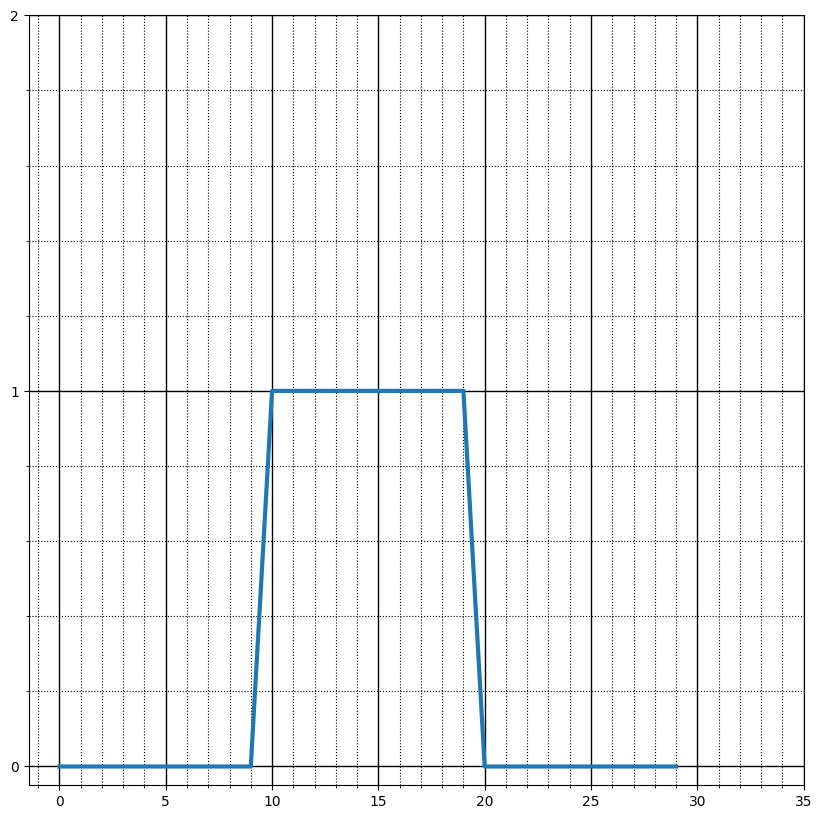

In [ ]:
draw_convolve(a, 3)

Сигнал **b**

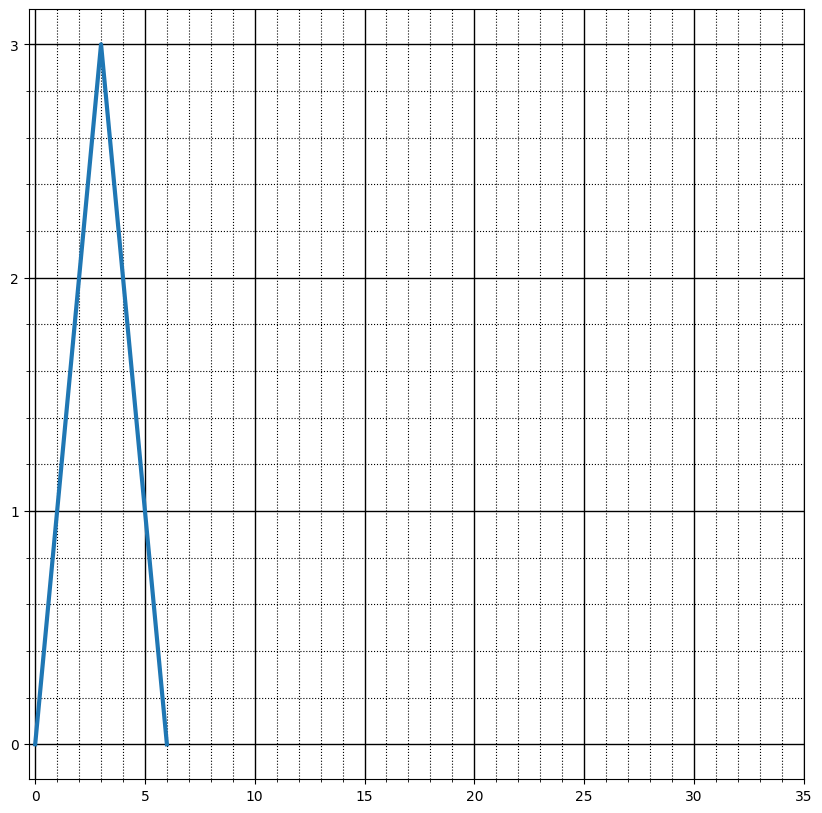

In [ ]:
draw_convolve(b, 4)

Свертка **a** и **b**

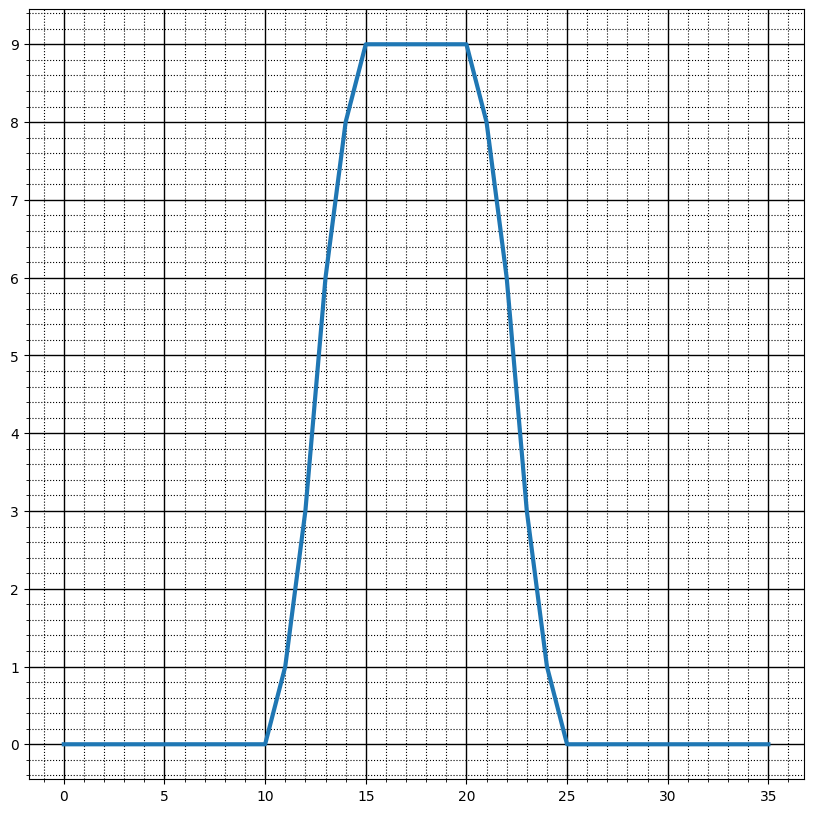

In [ ]:
draw_convolve(convolve(a, b), 10)

Все 3 графика на одной картинке:

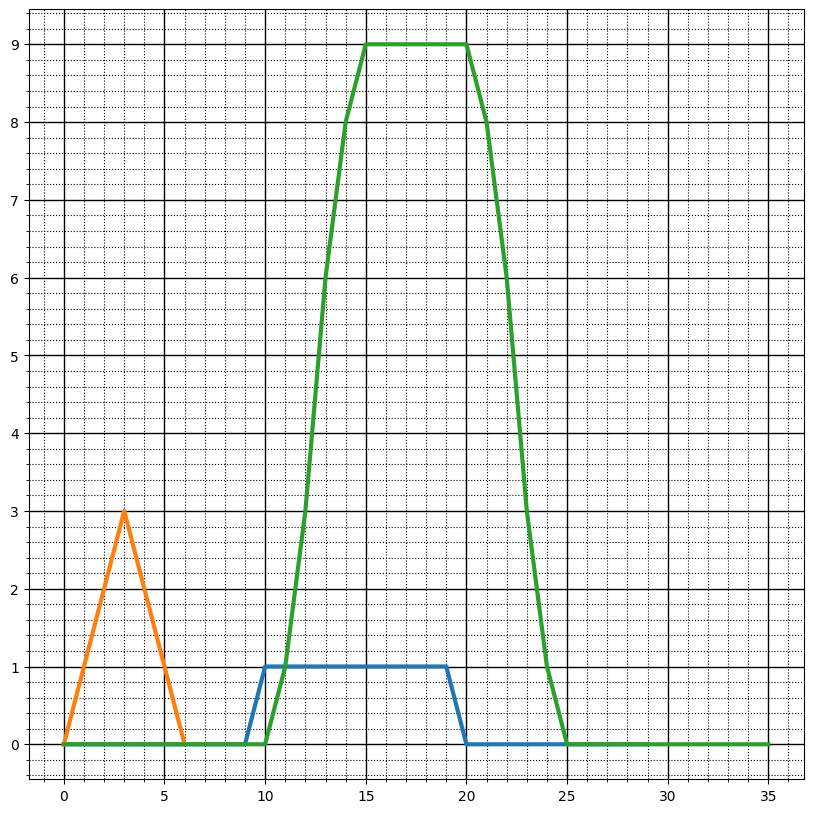

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(a, linewidth=3)
plt.plot(b, linewidth=3)
plt.plot(convolve(a, b), linewidth=3)
plt.minorticks_on()
plt.xticks(np.arange(0, 40, step=5))
plt.yticks(np.arange(0, 10, step=1))
plt.grid(which='major', color = 'k', linewidth = 1)
plt.grid(which='minor', color = 'k', linestyle = ':')
plt.show()